# Agenda
0. [Problem Statement & Synapsis](#step_0)
1. [Import Python Libraries](#step_1)
2. [Load Data - Data Source from [UCI-wholesale-customers](https://archive.ics.uci.edu/ml/datasets/wholesale+customers)](#step_2)
3. [Exploratory Data Analysis (EDA) & Pre-processing](#step_3)
4. [Feature Engineering and Feature Selection](#step_4)
5. [Modeling and Evaluation](#step_5)
6. [Summary](#step_6)

#### Problem statement: <a class="anchor" id="step_"></a>
Question - Let’s assume you are supporting the marketing department to segment wholesale customers so that promotion decision can refer to the segmentation results. What do the segmentation results represent and how the model make the segmentation? 

#### Synopysis:
Objective – Creating a model to segment wholesale customers.

## Import Python Libraries <a class="anchor" id="step_1"></a>

In [1]:
## Import Data and Number Processing Libraries
import pandas as pd 
import numpy as np
import math
import random

## Import Visualisation Libraries
import seaborn as sns
import pylab
pylab.style.use('seaborn-pastel')
import matplotlib.pyplot as plt
%matplotlib inline

## Import Data Preprocessing Libraries
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import boxcox, norm
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

## Import Model & Metric Libraries
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage

## Import Metric & Model Validation Libraries
from sklearn import metrics
from sklearn.model_selection import cross_validate

## Import Other Required Libraries
import time
start = time. time()
import warnings
warnings.filterwarnings('ignore')

## Load Data  <a class="anchor" id="step_2"></a>

### Data Source from [UCI-wholesale-customers](https://archive.ics.uci.edu/ml/datasets/wholesale+customers)

**Abstract**<br>
<i>The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories.</i><br><br>
**Data Source**<br> 
UCI Machine Learning Repository<br><br>
**Origin**<br>
Margarida G. M. S. Cardoso, margarida.cardoso '@' iscte.pt, ISCTE-IUL, Lisbon, Portugal
https://archive.ics.uci.edu/ml/datasets/Wholesale+customers<br><br>
**Attribute Information**
1) FRESH: annual spending (m.u.) on fresh products (Continuous); <br>
2) MILK: annual spending (m.u.) on milk products (Continuous);<br>
3) GROCERY: annual spending (m.u.)on grocery products (Continuous);<br>
4) FROZEN: annual spending (m.u.)on frozen products (Continuous)<br>
5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)<br>
6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);<br>
7) CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)<br>
8) REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)<br>

**Purpose**<br>
<i>Data preprocessing, visualization and using Supervised & Unsupervised learning model to discover different segments of customers.</i><br><br>

In [2]:
## Load dataset from UCI repository using URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
column_names = ['Channel','Region','Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']
df = pd.read_csv(url, names=column_names)

## Load dataset from downloaded csv from UCI repository 
df = pd.read_csv('../datasets/clustering/Wholesale customers data.csv')
df.sample(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
320,1,2,1774,3696,2280,514,275,834
284,1,3,68951,4411,12609,8692,751,2406
416,2,3,4389,10940,10908,848,6728,993
278,1,3,11693,2317,2543,5845,274,1409
82,2,3,10362,9232,11009,737,3537,2342


## Exploratory Data Analysis (EDA) & Pre-processing <a class="anchor" id="step_3"></a>

**Exploratory Data Analysis (EDA)** is aim to perform initial investigations on data for checking data quality, discovering patterns, identifying anomalies, and testing hypothesis. This is implemented with the help of statistical information and graphics. <br><br>

After the initial investigation, we might need to process the data with multiple **pre-processing** techniques to make the dataset ready for basic modeling. Besides, based on the selected models, more pre-processing steps should be implemented to transform data in a way that most suits the model algorithms. 

In [3]:
## Check the dataset size and the columns' information
## Note here we will use the toy dataset to demonstrate multiple clustering algorithms
print(f"Dataset Shape: {df.shape}\n")
df.info()

Dataset Shape: (440, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


### Methods to Handle Missing Values

As identified earlier, there are no missing values in this dataset, so we will not implement pre-processing steps to deal with missing values. Here are some methods that can be considered in the future: <br><br>
**1.Deleting Rows:**<i> We can adopt this method when the missing values take only a small portion of the whole dataset. Otherwise, this method might cause data loss and bias.</i><br>
**2.Imputing with Mean/Median/Mode/Interpolation:**<i> This technique can help to estimate unknown data points. When using Mean/Median/Mode as the imputed values, statistical information (Mean/Median/Mode) of the whole dataset stay the same and no bias is introduced. However, this will add variance to the dataset and does not preserve the relationships among variables. For numerical features, we can use interpolation instead to impute missing values between known data points. Interpolations are especially useful for time series data or image processing.</i><br>
**3.Assigning an Unique Category:**<i> When there are missing values in categorical features, we can consider to assign a new category such as "unknown" to the missing values. This strategy can add missing values information into the dataset. However, it might result in a poorer performance.</i><br>
**4.Predicting Missing Values:**<i> By using ML algorithms to estimate missing values from features that do not have missing values, we can improve the accuracy as long as the bias is not increased. </i> <br>
**5.Using Algorithms that Support Missing Values:**<i> Some algorithms, such as K–Nearest Neighbour or Random Forest, can be adopted as the results are not critically affected by missing values. </i> 

In [4]:
## There are no missing values in this dataset. However, if there are missing values in a dataset, 
## we can apply a above mentioned methods to handle missing values

## below funciton can also be used to check null value counts
# df.isnull().sum() 

## Now check for duplicated rows
print(df.duplicated().sum())
## Double check
bool_series = df.duplicated()
if(bool_series.any()):
    print("There exist duplicated rows!\n")
else:          
    print("There is no duplicated row.\n")
    
## Check the unique values of each column
print(df.nunique())

0
There is no duplicated row.

Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
dtype: int64


In [5]:
## Check the unique values of Channel & Region column
column_list = ['Channel','Region']

for col in column_list:
    print('Feature: {:<9s} | Unique-Count: {:<3} | Categories: {:}'.format(col,df[col].nunique(),df[col].unique()))

Feature: Channel   | Unique-Count: 2   | Categories: [2 1]
Feature: Region    | Unique-Count: 3   | Categories: [3 1 2]


In [6]:
## Check the statistical summary of the dataset
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
df.groupby(['Channel', 'Region']).count()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
Channel Region                                                            
1       1          59    59       59      59                59          59
        2          28    28       28      28                28          28
        3         211   211      211     211               211         211
2       1          18    18       18      18                18          18
        2          19    19       19      19                19          19
        3         105   105      105     105               105         105

In [8]:
## There are only 2 channels and 3 regions, we can check median and mean value by grouping Cannel & Region
df_dropChannelRegion = df.drop(['Channel','Region'], axis=1)
df.groupby(['Channel', 'Region']).agg(['median','mean']).round(1)

Fresh             Milk          Grocery           Frozen  \
               median     mean  median     mean  median     mean  median   
Channel Region                                                             
1       1        8656  12902.3  2280.0   3870.2    2576   4026.1  1859.0   
        2        9787  11650.5  1560.5   2304.2    3352   4395.5  2696.5   
        3        9612  13878.1  2247.0   3487.0    2642   3886.7  1960.0   
2       1        2926   5200.0  8866.0  10784.0   16106  18471.9  1522.0   
        2        6468   7289.8  6817.0   9190.8   12469  16326.3   934.0   
        3        7362   9831.5  7845.0  10981.0   12121  15953.8  1059.0   

                       Detergents_Paper         Delicassen          
                  mean           median    mean     median    mean  
Channel Region                                                      
1       1       3127.3              412   950.5        749  1197.2  
        2       5745.0              325   482.7        883  1105.9  
        3       3656.9              375   786.7        823  1518.3  
2       1       2584.1             6177  8225.3       1414  1871.9  
        2       1540.6             6236  8410.3       1037  1239.0  
        3       1513.2             5121  6899.2       1386  1826.2

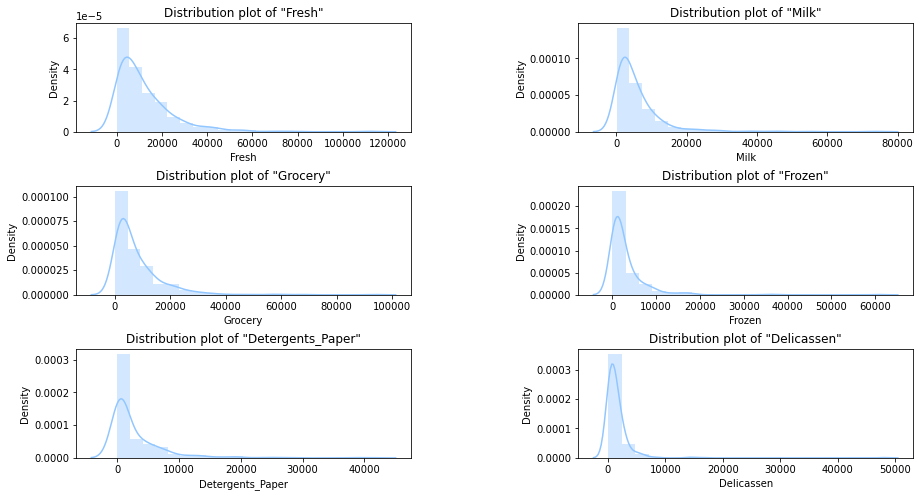

In [9]:
## plot the distribution of each features
plt.figure(1 , figsize = (15 , 8))
n = 0 
for x in ['Fresh' , 'Milk' , 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']:
    n += 1
    plt.subplot(3 , 2 , n)
    plt.subplots_adjust(hspace=0.5 , wspace=0.5)
    sns.distplot(df[x] , bins=20)
    plt.title('Distribution plot of "{}"'.format(x))
    plt.ylabel("Density")
plt.show()

### Pre-processing
In this phase, we will conduct data-preprocessing to prepare the dataset ready for modeling. There are a few aspects one should investigate the dataset. <br> 
For example:
1. If the data has html tags, then remove it.
2. If the data contains Null values, then remove or impute it.
3. If the data has irrelevant features, then drop it
4. If the data has abbreviation, then replace it.
5. If the data has categorical features, then encode it if the planned algorithm cannot deal with categorical features intrinsically.
6. If the data has numerical features, then scale it to prevent bias. 
7. If the text-based data has stop words, then remove it.

From the plots earlier, the data appears to be very skewed with pretty long tail that can negatively affect some models, sush as k-means clustering. K-means clustering is highly sensitive to the outliers, because outliers can strongly bias the centroids estimation. In such a situation, K-Medians might be advisable. <br><br>

However, data might be transformed as well to suits more algorithms. One of transformation techniques called Box-Cox method aims to satisfy the basic assumptions of linear models, namely linearity, normality, and homogeneity. It can be implemented via ScikitLearn PowerTransformer() function or with the help of box-cox from Scipy Stats library. We will choose the second option.

In [10]:
df_boxcox = df.copy()
lamb = []
confidence = []

for i in df_boxcox.columns[2:]:
    ## Add a tiny constant as values need to be positive for Box-Cox
    df_boxcox[i], coef, conf = boxcox(df_boxcox[i]+0.0000001, alpha=0.05)  
                                                                
    lamb.append(coef)
    confidence.append(conf)

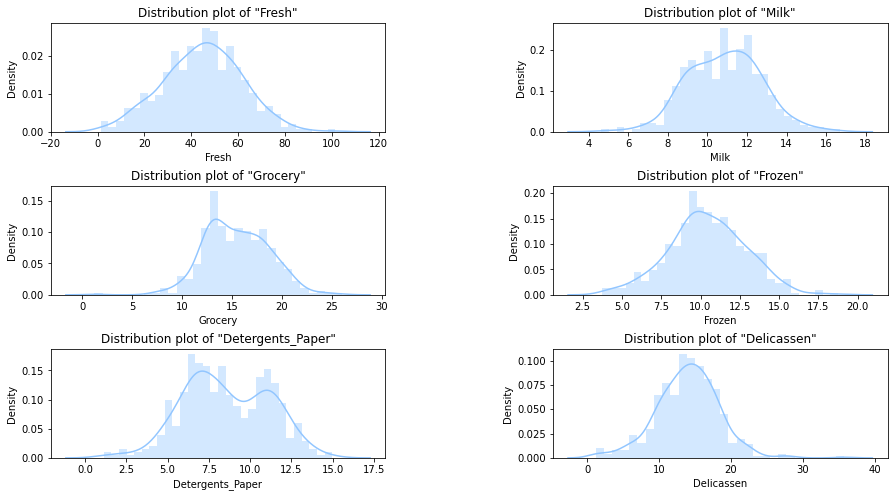

In [11]:
## plot the distribution of each features after boxcox transformation
plt.figure(1 , figsize = (15 , 8))
n = 0 
for x in ['Fresh' , 'Milk' , 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']:
    n += 1
    plt.subplot(3 , 2 , n)
    plt.subplots_adjust(hspace=0.5 , wspace=0.5)
    sns.distplot(df_boxcox[x] , bins=30)
    plt.title('Distribution plot of "{}"'.format(x))
    plt.ylabel("Density")
plt.show()

The next step is to scale the features to prevent bias. As many clustering algorithms use the distance analysis, performing the analysis on the unscaled data between variables will lead to biased learning. For example, if one variable is expressed in kilometers and another is in meters, K-means will consider 1000 meters as 1000 times higher than 1 km as it considers only values and not units. As a result, we should scale the data to the same unit / "distance dimension".

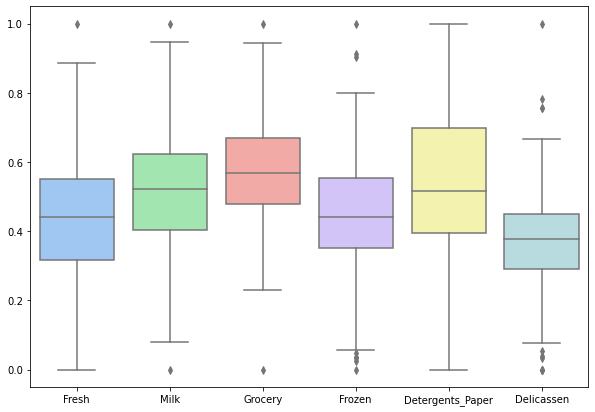

In [12]:
## Select numerical data that needs to be scaled
norm_data = df_boxcox.iloc[:,2:].copy()
scaler = MinMaxScaler()

columns = df_boxcox.columns[2:]
norm_data = scaler.fit_transform(norm_data) 
norm_data = pd.DataFrame(norm_data, columns=columns)

plt.figure(figsize=(10,7))
sns.boxplot(data=norm_data)
plt.show()

The first clustering method we will use is k-means, which can be negatively affected by outliers due to the calculation of cluster centroids. Therefore removing outliers outside from 1.5x Interquartile range from 1st or 3rd quartile will be implemented.

In [13]:
outlier_cleaned = norm_data.copy()

for i in norm_data.columns:
    pct75 = np.percentile(norm_data[i], 75)
    pct25 = np.percentile(norm_data[i], 25)
    iqr   = pct75-pct25
    outlier_cleaned[i] = np.where(outlier_cleaned[i]>pct75+1.5*iqr, pct75+1.5*iqr,outlier_cleaned[i] )
    outlier_cleaned[i] = np.where(outlier_cleaned[i]<pct25-1.5*iqr, pct25-1.5*iqr,outlier_cleaned[i] )

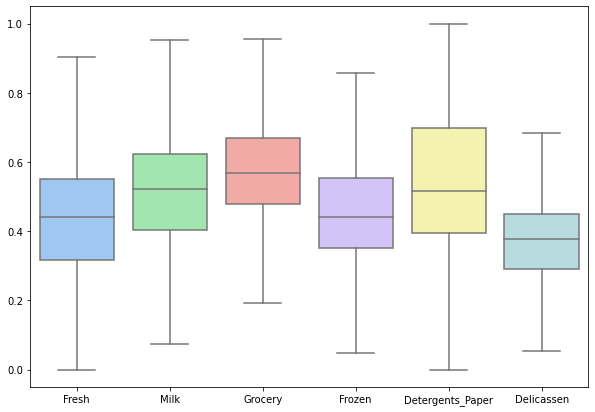

In [14]:
## Plot the boxplot after removing outliers
plt.figure(figsize=(10,7))
sns.boxplot(data=outlier_cleaned)
plt.show()

Removing outlier will cause data loss. As the dataset is very small, data loss might not be suitable, so one can apply  winsorize instead to capture the outliers.

Come back to the two categorical variables, Region and Channel, as k-means cannot deal with categorical data, we have to encode them via on-hot encoder, for example. This is because k-means is a distance-based algorithm, and categorical variables are not ordinal and their scales are not meaningful for distance calculations.

In [15]:
catgorical_data = df_boxcox.iloc[:,:2]
catgorical_data.shape

(440, 2)

In [16]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = encoder.fit_transform(catgorical_data).toarray()
df_final = outlier_cleaned.join(pd.DataFrame(encoder_df))
df_feature_final = df_final.copy()

## Feature Engineering and Feature Selection <a class="anchor" id="step_4"></a>

**Feature Engineering** is the process of transforming pre-processed data into features that better represent the underlying problem to predictive models, resulting in improved model accuracy.

**Feature Selection**, on the other hand, is the process of choosing a subset of features that contributes the most to the model performance of, and this is without applying any type of transformation on it. <br>

There are two types of feature selestion:<br>
**1.Unsupervised:**<i> Using Correlation and removing redundant variables when multiple variables are highly correlated to each other. </i><br>
**2.Supervised:**<i> Removing irrelevant variables via Statistical Methods, Feature Importance Methods (Filter-relationship with target varible) or Decision Trees (Intrinsic method). 

As in our simple dataset, the features are simply the amount of different type of products, we will not implement feature engineering here. For feature selection, we will check the correlation between each pair of features.

Text(0.5, 1.0, 'Correlation')

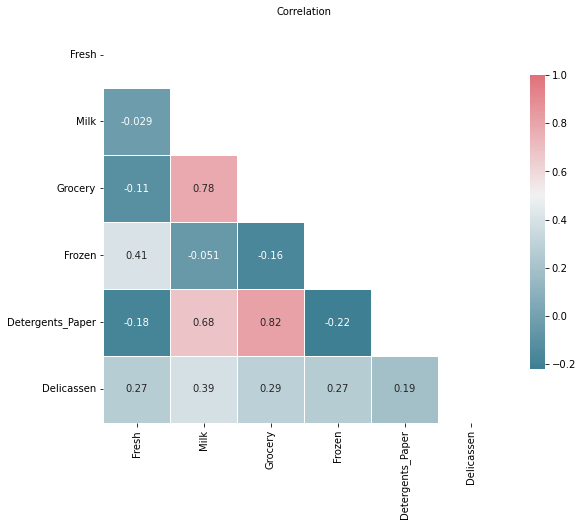

In [17]:
## Check the pairwise correlation and visualize with heatmap
corr = outlier_cleaned.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(9, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0.5, square=True, linewidths=.5, cbar_kws={"shrink": .6},annot=True)
plt.title("Correlation", fontsize =10)

From above heatmap we can see that Grocery and Detergents_Paper are highly positively correlated. Milk is also highly positively corrolated with Grocery and Detergents_Paper. We might use some technique to prune or summarize the features.

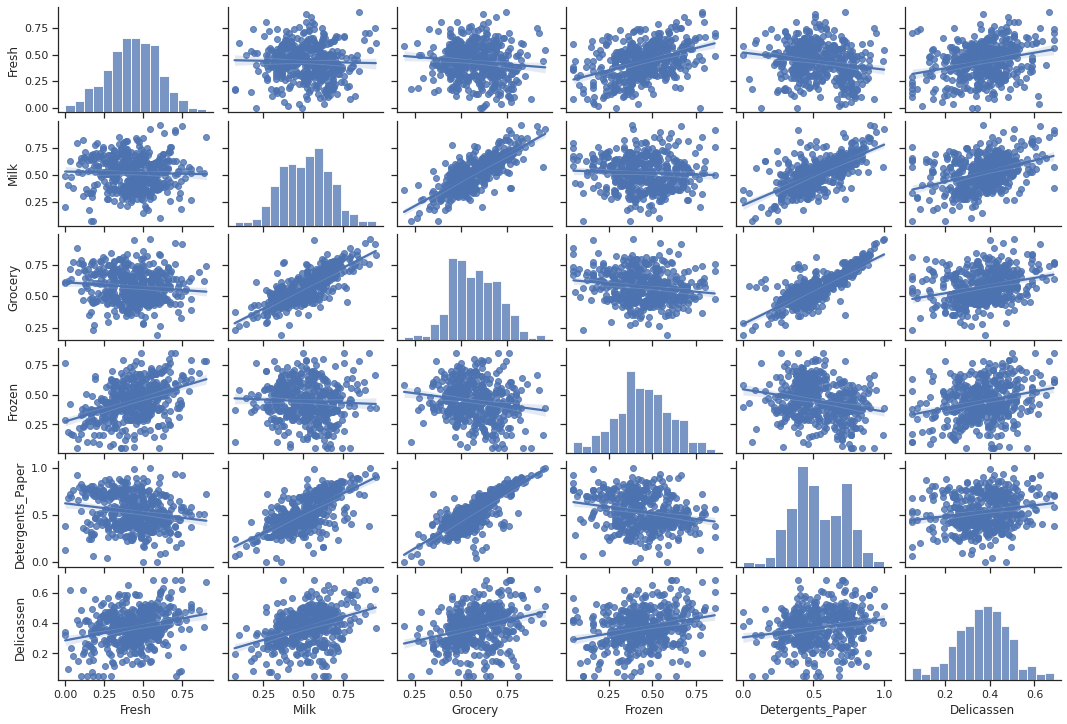

In [18]:
## Bivariate analysis with Pairplot
sns.set(style="ticks")
graph = sns.pairplot(outlier_cleaned, kind='reg')
graph.fig.set_size_inches(15,10)

## Modeling and Evaluation <a class="anchor" id="step_5"></a>

In order to perform k-means, we have to choose number of clusters at first. **Elbow Trick** can be used to determine the best number of clusters, which produces the largest reduction of the distance sum inside the cluster, called **Within Sum of Squares (WSS)**.

In [19]:
elbow_results=[]

for i in range(2,10):
    kmeans = KMeans(init='k-means++' , n_clusters=i, random_state=0)
    results = cross_validate(kmeans, df_feature_final, cv=5)
    elbow_results.append(results['test_score'].mean()*-1)

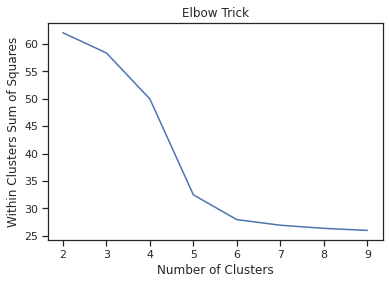

In [20]:
plt.plot(range(2,len(elbow_results)+2) , elbow_results)
plt.title('Elbow Trick')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Clusters Sum of Squares')
plt.show()

From the elbow trick plot we can see that the highest slope appear at 5 clusters, which means that having 5 clusters will obtain the greatest proportional change in minimizing the WSS. Adding more clusters can reduce the WSS but not as much as the change between 4 and 5 clusters, so we will use 5 clusters as the initial parameter for k-means algorithm.

In [21]:
kmeans = KMeans(init='k-means++', n_clusters=5, random_state=5)
kmeans_model = kmeans.fit(df_feature_final)
df['kmeans_clusters'] = kmeans_model.predict(df_feature_final).astype('str')
df_final['kmeans_clusters'] = df['kmeans_clusters']

Now we can visualize the clusters by using Principal Components Analysis (PCA) to reduce the dimensionality. PCA can also be used before fitting the model to reduce the computation complexity. To start, we will determine the best number of components to use in order to capture at least 90% of the variability of the dataset.

In [22]:
pca = PCA( n_components=len(df_feature_final.columns) )
pca.fit( df_feature_final )
pca.explained_variance_ratio_

array([4.70627622e-01, 3.05785552e-01, 1.24664710e-01, 3.83622564e-02,
       2.55173596e-02, 1.51057068e-02, 1.02839430e-02, 6.81638761e-03,
       2.83646169e-03, 1.76733976e-32, 2.25708947e-34])

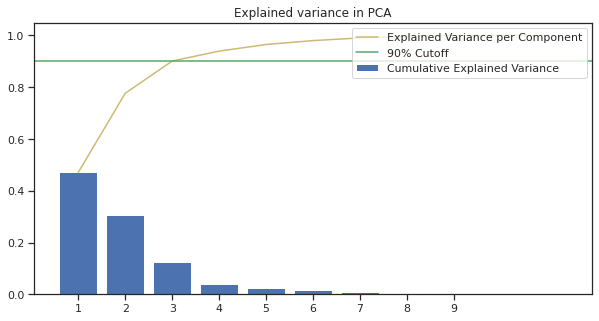

In [23]:
plt.figure(figsize=(10,5))
plt.plot(range(1,12), np.cumsum(pca.explained_variance_ratio_), c='y', label='Explained Variance per Component')
plt.bar(range(1,12), height=pca.explained_variance_ratio_, label='Cumulative Explained Variance')
plt.axhline(y=0.9, c='g', label='90% Cutoff')
plt.title('Explained variance in PCA')
plt.xticks(range(1,10))
plt.legend(loc=1)
plt.show()

From the plot we cam see that 90% of explained variability is reached when 3 components are used. As a results, we will implement dimensionality reduction with 3 principal components.

<Figure size 1080x1080 with 0 Axes>

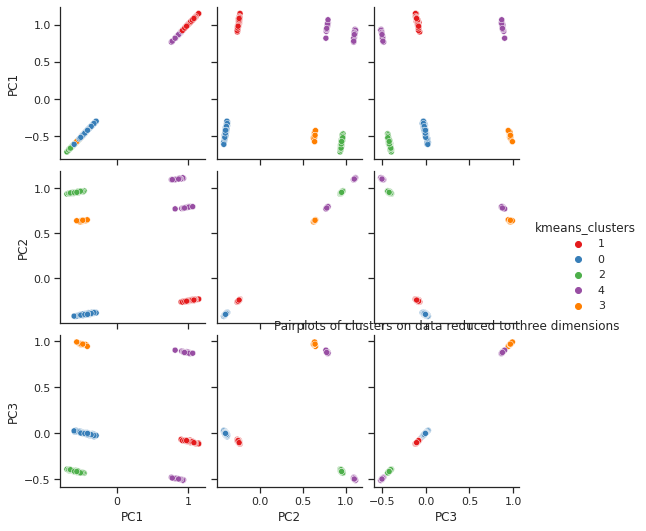

In [24]:
pca = PCA(n_components=3)
reduced = pca.fit_transform(df_feature_final)
reduced = pd.DataFrame(np.column_stack([reduced, df_final.kmeans_clusters]), 
                       columns=['PC1','PC2','PC3','kmeans_clusters'])
plt.figure(figsize=(15,15))
sns.pairplot(data=reduced, hue='kmeans_clusters', diag_kind=None, vars=reduced.columns[0:-1], palette='Set1')
plt.title('Pairplots of clusters on data reduced to three dimensions')
plt.show()

From above plots we cam see that with the first two principal components (PC), the dataset are devided into 5 clusters but not perfectly. Now we will visualize with 2 PC.

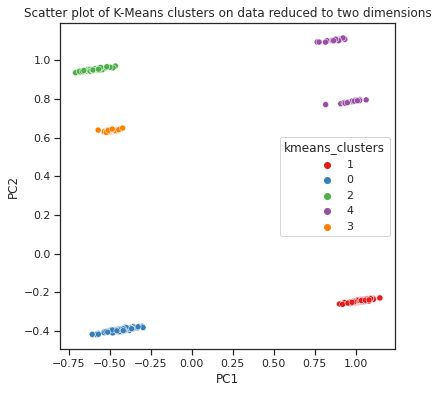

In [25]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(df_feature_final)
reduced = pd.DataFrame(np.column_stack([reduced, df_final.kmeans_clusters]), 
                       columns=['PC1','PC2','kmeans_clusters'])

plt.figure(figsize=(6,6))
sns.scatterplot(data=reduced, hue='kmeans_clusters', x='PC1',y='PC2', palette=sns.color_palette("Set1", 5))
plt.title('Scatter plot of K-Means clusters on data reduced to two dimensions',  fontsize=12)
plt.show()

Still, the dataset are devided into 5 clusters without clusters overlapping each other. However, the results seem to be not perfect: changing the cluster number to 6 might represent the dataset better.

Now we will evaluate the means of the original numerical feature values for different clusters. 

<Figure size 720x720 with 0 Axes>

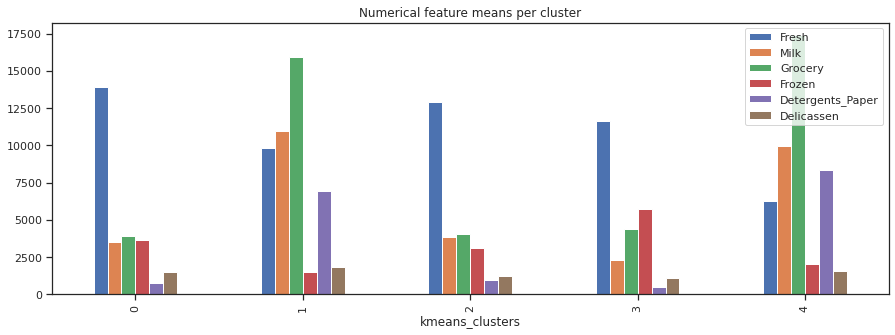

In [26]:
mean = df.iloc[:,2:].groupby('kmeans_clusters').mean()
# var = df.iloc[:,2:].groupby('clusters').var()

plt.figure(figsize=(10,10))
mean.groupby('kmeans_clusters').mean().plot(kind='bar', figsize=(15,5))
plt.title('Numerical feature means per cluster')
plt.show()

We will try other clustering methods now. <br>
1. **DBSCAN**
2. **Agglomerative Clustering**: Hierarchical clustering. This algorithm creates a tree like hierarchy construction. As initial point it assumes that every data point is a single cluster, and step by step the pair of data points unite together based on their similarity. The process is continued until all data points are united, or stopped if the distance between data points exceeds a defined threshold and no more merge can happen. <br>
Advantages: 
* no pre-defined hyperparameter of cluster number is necessary
* not like k-means, which works better principally with only spherically distributed data
* clustering process can be visualized by dendrogram plots

### DBSCAN

In [27]:
db = DBSCAN(eps=0.3, min_samples=10).fit(df_feature_final)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df_feature_final, labels))

Estimated number of clusters: 6
Estimated number of noise points: 31
Silhouette Coefficient: 0.631


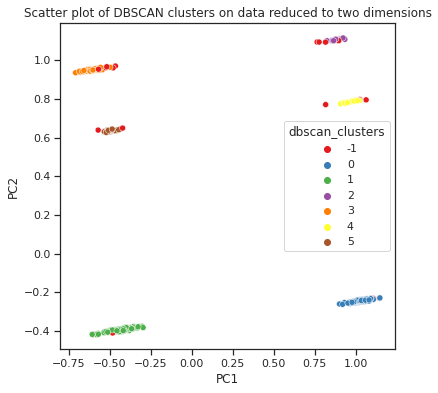

In [28]:
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_model = dbscan.fit(df_feature_final)
df['dbscan_clusters'] = dbscan_model.fit_predict(df_feature_final)
df_final['dbscan_clusters'] = df['dbscan_clusters']
hue_number = df['dbscan_clusters'].nunique()

reduced3 = pd.DataFrame(np.column_stack([reduced, df_final.dbscan_clusters]), 
                        columns=['PC1','PC2','kmeans_clusters','dbscan_clusters'])

plt.figure(figsize=(6,6))
sns.scatterplot(data=reduced3, hue='dbscan_clusters', x='PC1',y='PC2', palette=sns.color_palette("Set1", hue_number))
plt.title('Scatter plot of DBSCAN clusters on data reduced to two dimensions',  fontsize=12)
plt.show()

DBSCAN has the capability to identify outliers based on the conditions of hyperparameters. Those outliers get a -1 label from Python DBSCAN library and are marked with red color in the above scatter plot. We can see that DBSCAN identify 6 clusters and some outliers that are slightly deviated from other data points of each cluster. 

### Agglomerative Clustering

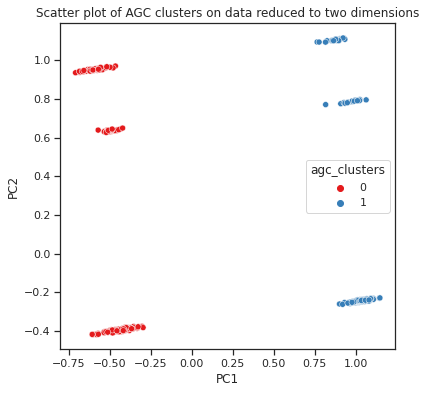

In [29]:
agc = AgglomerativeClustering(affinity='euclidean', linkage='ward')
df['agc_clusters'] = agc.fit_predict(df_feature_final)
hue_number = df['agc_clusters'].nunique()

reduced2 = pd.DataFrame(np.column_stack([reduced, df['agc_clusters']]), 
                        columns=['PC1','PC2','kmeans_clusters','agc_clusters'])

plt.figure(figsize=(6,6))
sns.scatterplot(data=reduced2, hue='agc_clusters', x='PC1', y='PC2', palette=sns.color_palette("Set1", hue_number))
plt.title('Scatter plot of AGC clusters on data reduced to two dimensions')
plt.show()

Let's see how the process of forming clusters of AgglomerativeClustering algorithm is by plotting the dendrogram.

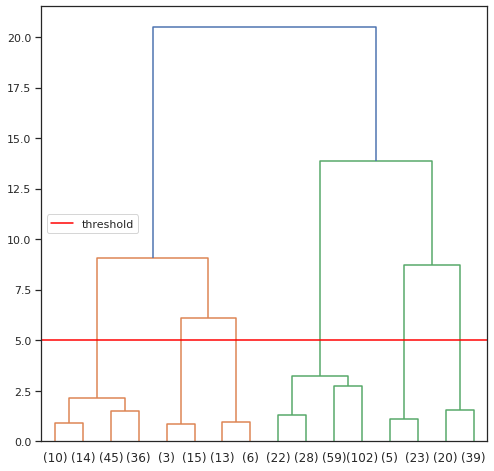

In [30]:
plt.figure(figsize=(8,8))
dendrogram(linkage(df_feature_final ,method='ward'), truncate_mode='level', p=3 )
plt.axhline(y=5, label='threshold', color='red')
plt.title  ='Dendrogram'
plt.xlabel = "Distance"  
plt.legend(loc=6)
plt.show()

From former 2-dimentional PCA scatter plot, humans might think 6 are the most suitable cluster number. The red line illustrates the situation when 6 clusters are selected. When evaluating the lines crossing the horizontal red line, we can find there are 6 vertical lines which denote the 6 clusters formed. The numbers in parenthesis represent numbers of observations.

Although the two clusters identified in the scatter plot are not subdivided, they obviously still have hidden subdivisions. With the two-cluster-results, we have 142 observations (10+14+45+36+3+15+13+6) in the first cluster, and 298 observations (22+28+59+102+5+23+20+39) in the second cluster.

## Summary <a class="anchor" id="step_6"></a>
In this notebook, we explore a dataset containing the wholesale customer information. After validating the data with EDA steps and preparing the data by applying several pre-processing steps, we achieve to serve the feature data that are ready for clustering analysis. We also apply 3 different clustering methods to segment the data and visulize the data in the projected 2-dimentional scatter plots.